In [13]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import *
from torchvision.transforms import ToTensor, Lambda
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
transform = transforms.Compose([
    transforms.Resize(128), # resize the images to 128x128
    transforms.CenterCrop(128), # crop the images to 128x128 about the center to ensure they are all the same size
    transforms.ToTensor(), 
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]), # normalize the images to fit the range [0.5, 1]
])

training_data = datasets.Flowers102(root = "data", split = 'train', 
                                    download = True, transform = transform)
test_data = datasets.Flowers102(root = "data", split = 'test', download = True, transform = transform)

100%|██████████| 344862509/344862509 [00:25<00:00, 13780085.87it/s]


Extracting data/flowers-102/102flowers.tgz to data/flowers-102


100%|██████████| 502/502 [00:00<00:00, 558943.62it/s]


100%|██████████| 14989/14989 [00:00<00:00, 37090514.84it/s]


In [ ]:
print(test_data.__getitem__(0)[0].shape)

torch.Size([3, 128, 128])


In [ ]:
batch_size = 149

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True, collate_fn=None)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True, collate_fn=None)
print(test_dataloader)
print(train_dataloader)

for x, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {x.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([149, 3, 128, 128])
Shape of y: torch.Size([149]) torch.int64


Feature batch shape: torch.Size([149, 3, 128, 128])
Labels batch shape: torch.Size([149])


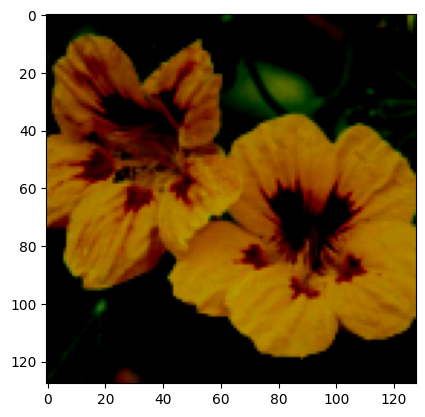

Label: 88


In [38]:
# Display image and label. This code has been inspired by code from https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze().numpy().transpose((1, 2, 0))
label = train_labels[0]
plt.imshow(img)
plt.show()
print(f"Label: {label}")